In [5]:
import numpy as np

In [6]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [206]:
from statsmodels.nonparametric.smoothers_lowess import lowess

n_time = 100
x = np.linspace(0.1, 10, n_time)

q = 3
r = 2

phi1 = 0.15
phi2 = -0.95
F = np.random.normal(0, 0.5, [n_time, r])
for t in range(1, n_time):
    F[t, 0] = phi1 * F[t - 1, 0] + F[t, 0]
    F[t, 1] = phi2 * F[t - 1, 1] + F[t, 1]
print(len(x))
print(len(F[:, 0]))
F[:, 0] = lowess(F[:, 0], x, is_sorted = True, frac = 0.1, it = 0)[:, 1]
F[:, 1] = lowess(F[:, 1], x, is_sorted = True, frac = 0.1, it = 0)[:, 1]
loading = np.random.normal(0, 0.5, [r, q])
sigma2_eps = [0.000001 for i in range(1, q + 1)]
eps = np.random.multivariate_normal(np.repeat(0, q), np.diag(sigma2_eps), n_time)
Y = np.matmul(F, loading) + eps
f1 = F[:, 0]
f2 = F[:, 1]

100
100


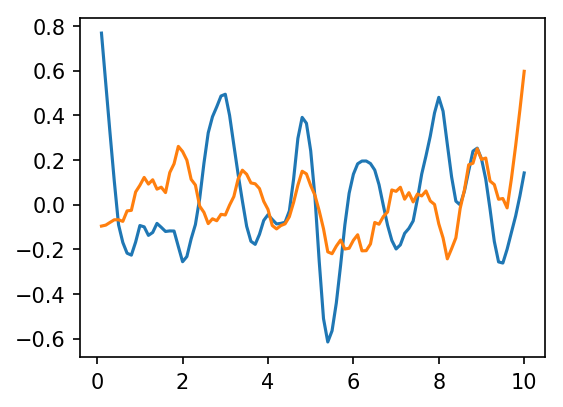

In [211]:
fig = plt.figure(figsize=(4, 3), dpi=150)
plt.plot(x, f1)
plt.plot(x, f2)
plt.show()

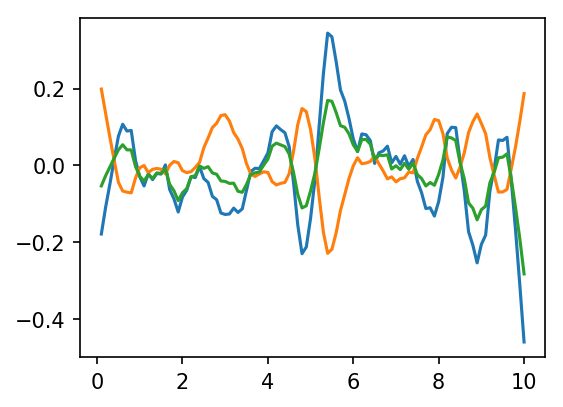

In [212]:
fig = plt.figure(figsize=(4, 3), dpi=150)
for j in range(q):
    plt.plot(x, Y[:, j])
plt.show()

In [213]:
from sklearn.decomposition import PCA

In [214]:
latent_dim = r
pca = PCA(n_components=latent_dim)
components = pca.fit_transform(Y)

In [215]:
Y_hat = pca.inverse_transform(components)
mse = np.mean((Y - Y_hat) ** 2)
print(mse)

3.495829195274222e-07


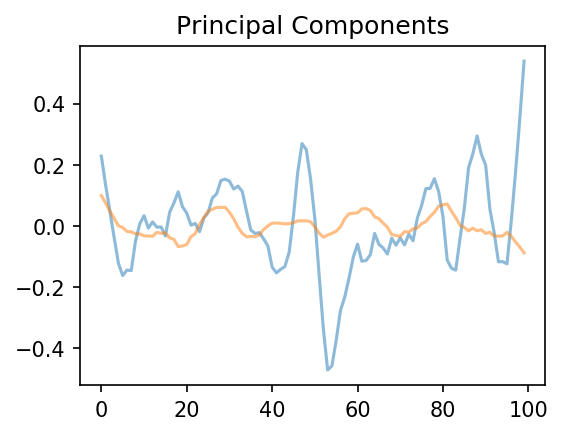

In [216]:
fig = plt.figure(figsize=(4, 3), dpi=150)
for j in range(2):
    plt.plot(components[:, j], alpha=0.5)
plt.title('Principal Components')
plt.show()

In [218]:
loading_matrix = np.random.normal(0, 1, [2, q])
Y_variance = np.random.normal(0, 0.2, q) ** 2
X = np.linspace(0.1, 10, n_time).reshape((n_time, 1))  # create initial GP covariance matrices
cov1 = sample_covariance(X, 1.0, 1.0)  # length scale 1.0 corresponds to 10 time points
cov2 = sample_covariance(X, 1.0, 1.0)  # variance scale set to 1.0 as well
S1, S2, S3, S4 = build_covariance_blocks([cov1, cov2], loading_matrix, Y_variance)
F = sample_conditional_F(Y, S1, S2, S3, S4)

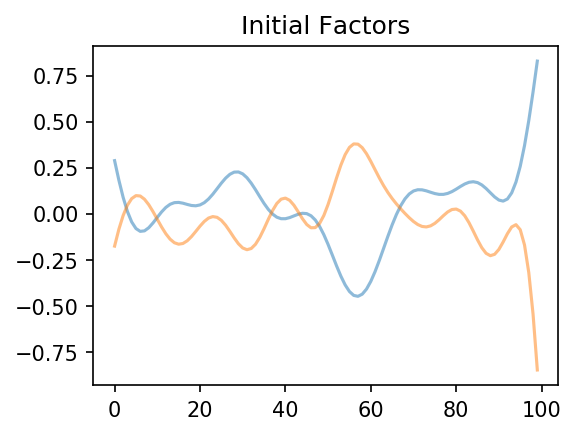

In [219]:
fig = plt.figure(figsize=(4, 3), dpi=150)
for j in range(2):
    plt.plot(F[:, j], alpha=0.5)
plt.title('Initial Factors')
plt.show()

In [220]:
def run_model_sampler(Y, initial_F, n_iter):
    """
    Create model and run Gibbs sampler for n iterations.
    """
    F_sample = []
    loading_sample = []
    variance_sample = []
    trace_sample = []
    mse_history = []
    F = initial_F
    for i in tqdm(range(n_iter)):
        F, loading_matrix, Y_variance, gp_traces, mse = gibbs_sampling(F, Y)
        F_sample.append(F)
        loading_sample.append(loading_matrix)
        variance_sample.append(Y_variance)
        trace_sample.append(gp_traces)
        mse_history.append(mse)
    return F_sample, loading_sample, variance_sample, trace_sample, mse_history

In [221]:
results = run_model_sampler(Y, F, 200)

  0%|                                                                                          | 0/200 [00:00<?, ?it/s]

0.003978487308190385


C:\Users\sp\Anaconda3\lib\site-packages\theano\tensor\basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 411.63it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

  0%|▍                                                                                 | 1/200 [00:05<17:18,  5.22s/it]

0.005413857644695518


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 414.89it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

  1%|▊                                                                                 | 2/200 [00:10<17:06,  5.19s/it]

0.006081420041711394


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 396.56it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

  2%|█▏                                                                                | 3/200 [00:15<17:00,  5.18s/it]

0.006196241390430951


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 410.22it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

  2%|█▋                                                                                | 4/200 [00:22<18:13,  5.58s/it]

0.006948761498084868


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 400.36it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

  2%|██                                                                                | 5/200 [00:27<17:46,  5.47s/it]

0.006427701300772205


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 399.18it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

  3%|██▍                                                                               | 6/200 [00:32<17:27,  5.40s/it]

0.007006105327207162


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 396.95it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

  4%|██▊                                                                               | 7/200 [00:37<17:19,  5.38s/it]

0.006457734511746312


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 395.26it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

  4%|███▎                                                                              | 8/200 [00:44<18:21,  5.74s/it]

0.007167046303996194


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 386.24it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

  4%|███▋                                                                              | 9/200 [00:49<17:50,  5.61s/it]

0.007209471310546777


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 383.53it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

  5%|████                                                                             | 10/200 [00:55<17:32,  5.54s/it]

0.006614096425351414


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 380.38it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

  6%|████▍                                                                            | 11/200 [01:00<17:13,  5.47s/it]

0.006895090696948092


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 397.35it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

  6%|████▊                                                                            | 12/200 [01:07<18:18,  5.85s/it]

0.0072197367173336986


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 393.58it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

  6%|█████▎                                                                           | 13/200 [01:12<17:42,  5.68s/it]

0.007473209816256909


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 390.39it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

  7%|█████▋                                                                           | 14/200 [01:17<17:18,  5.58s/it]

0.007696063621862785


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 398.79it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

  8%|██████                                                                           | 15/200 [01:23<16:56,  5.50s/it]

0.006947071775738391


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 389.87it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

  8%|██████▍                                                                          | 16/200 [01:28<16:40,  5.44s/it]

0.006569073418155302


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 397.74it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

  8%|██████▉                                                                          | 17/200 [01:35<17:50,  5.85s/it]

0.0072965110188267365


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 381.95it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

  9%|███████▎                                                                         | 18/200 [01:40<17:22,  5.73s/it]

0.007096712917913202


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 386.78it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 10%|███████▋                                                                         | 19/200 [01:46<17:07,  5.68s/it]

0.007507141696073993


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 383.30it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 10%|████████                                                                         | 20/200 [01:51<16:45,  5.58s/it]

0.007928240146272005


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 399.53it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 10%|████████▌                                                                        | 21/200 [01:58<17:44,  5.95s/it]

0.007340511193700084


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 389.38it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 11%|████████▉                                                                        | 22/200 [02:03<17:11,  5.80s/it]

0.007703125200395369


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 387.36it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 12%|█████████▎                                                                       | 23/200 [02:09<16:47,  5.69s/it]

0.007449830297027802


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 236.18it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 12%|█████████▋                                                                       | 24/200 [02:16<18:28,  6.30s/it]

0.0077672112952716565


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 274.26it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 12%|██████████▏                                                                      | 25/200 [02:25<20:29,  7.03s/it]

0.006970962500273422


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 334.38it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 13%|██████████▌                                                                      | 26/200 [02:31<19:45,  6.82s/it]

0.007149817661648151


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 333.09it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 14%|██████████▉                                                                      | 27/200 [02:38<19:03,  6.61s/it]

0.007288075842315033


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 332.72it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 14%|███████████▎                                                                     | 28/200 [02:44<18:34,  6.48s/it]

0.007015004218327731


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 329.72it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 14%|███████████▋                                                                     | 29/200 [02:50<18:11,  6.38s/it]

0.006877989635651929


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 343.68it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 15%|████████████▏                                                                    | 30/200 [02:58<19:15,  6.80s/it]

0.006629673459729487


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 332.46it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 16%|████████████▌                                                                    | 31/200 [03:04<18:34,  6.59s/it]

0.007567745870354326


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 331.26it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 16%|████████████▉                                                                    | 32/200 [03:10<18:02,  6.45s/it]

0.0067531198264605555


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 334.12it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 16%|█████████████▎                                                                   | 33/200 [03:16<17:38,  6.34s/it]

0.00819228420260278


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 334.12it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 17%|█████████████▊                                                                   | 34/200 [03:24<18:44,  6.78s/it]

0.007575430044179886


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 335.41it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 18%|██████████████▏                                                                  | 35/200 [03:30<18:08,  6.60s/it]

0.008232533556139149


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 323.60it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 18%|██████████████▌                                                                  | 36/200 [03:36<17:48,  6.51s/it]

0.006806274938253895


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 329.10it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 18%|██████████████▉                                                                  | 37/200 [03:43<17:43,  6.53s/it]

0.00736486245475283


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 326.31it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 19%|███████████████▍                                                                 | 38/200 [03:51<18:54,  7.00s/it]

0.007353437985039278


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 325.88it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 20%|███████████████▊                                                                 | 39/200 [03:57<18:13,  6.79s/it]

0.0066438666256157086


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 317.87it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 20%|████████████████▏                                                                | 40/200 [04:04<17:48,  6.68s/it]

0.007525129065694781


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 312.66it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 20%|████████████████▌                                                                | 41/200 [04:10<17:28,  6.59s/it]

0.00821751461135389


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 317.71it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 21%|█████████████████                                                                | 42/200 [04:16<17:07,  6.51s/it]

0.008104501402213528


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 319.48it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 22%|█████████████████▍                                                               | 43/200 [04:24<18:17,  6.99s/it]

0.007058214688738804


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 313.65it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 22%|█████████████████▊                                                               | 44/200 [04:31<17:45,  6.83s/it]

0.00783742935670419


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 309.22it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 22%|██████████████████▏                                                              | 45/200 [04:37<17:21,  6.72s/it]

0.007063871740655347


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 325.80it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 23%|██████████████████▋                                                              | 46/200 [04:44<16:46,  6.53s/it]

0.007294626313882608


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 323.26it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 24%|███████████████████                                                              | 47/200 [04:51<17:39,  6.92s/it]

0.00797955251737294


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 305.61it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 24%|███████████████████▍                                                             | 48/200 [04:58<17:08,  6.77s/it]

0.008383904255449036


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 307.33it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 24%|███████████████████▊                                                             | 49/200 [05:04<16:46,  6.67s/it]

0.008271257479803255


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 288.81it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 25%|████████████████████▎                                                            | 50/200 [05:11<16:41,  6.68s/it]

0.007515387688193093


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 309.53it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 26%|████████████████████▋                                                            | 51/200 [05:17<16:18,  6.56s/it]

0.008015547839435998


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 317.20it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 26%|█████████████████████                                                            | 52/200 [05:26<17:35,  7.13s/it]

0.00878933056119727


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 219.79it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 26%|█████████████████████▍                                                           | 53/200 [05:34<18:20,  7.49s/it]

0.007907541575031492


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 272.58it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 27%|█████████████████████▊                                                           | 54/200 [05:41<17:45,  7.30s/it]

0.008232583090988512


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 274.38it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 28%|██████████████████████▎                                                          | 55/200 [05:48<17:27,  7.22s/it]

0.008768202618609429


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 285.12it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 28%|██████████████████████▋                                                          | 56/200 [05:54<16:52,  7.03s/it]

0.007958509339417578


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 284.17it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 28%|███████████████████████                                                          | 57/200 [06:03<17:58,  7.54s/it]

0.00842375128726537


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 278.18it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 29%|███████████████████████▍                                                         | 58/200 [06:10<17:18,  7.31s/it]

0.009111102743124523


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 285.64it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 30%|███████████████████████▉                                                         | 59/200 [06:17<16:42,  7.11s/it]

0.009300245312332743


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 287.49it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 30%|████████████████████████▎                                                        | 60/200 [06:23<16:15,  6.96s/it]

0.008731370605604215


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 285.24it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 30%|████████████████████████▋                                                        | 61/200 [06:32<17:19,  7.48s/it]

0.00863922755703017


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 284.77it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 31%|█████████████████████████                                                        | 62/200 [06:39<16:51,  7.33s/it]

0.008633728414241619


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 281.70it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 280.65it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
 32%|█████████████████████████▌                                                       | 63/200 [06:46<16:28,  7.21s/it]

0.008558181718474027


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 277.42it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 32%|█████████████████████████▉                                                       | 64/200 [06:53<16:03,  7.09s/it]

0.008850765148652366


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 281.31it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 32%|██████████████████████████▎                                                      | 65/200 [06:59<15:45,  7.00s/it]

0.008782768263989296


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 284.23it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 33%|██████████████████████████▋                                                      | 66/200 [07:08<16:43,  7.49s/it]

0.009225580804907919


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 276.21it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 34%|███████████████████████████▏                                                     | 67/200 [07:15<16:12,  7.31s/it]

0.009034882234132915


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 281.84it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 34%|███████████████████████████▌                                                     | 68/200 [07:22<15:49,  7.20s/it]

0.008783474268239617


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 283.63it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 34%|███████████████████████████▉                                                     | 69/200 [07:29<15:30,  7.10s/it]

0.008990231184698978


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 283.16it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 35%|████████████████████████████▎                                                    | 70/200 [07:36<15:15,  7.04s/it]

0.008994010218745227


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 284.42it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 36%|████████████████████████████▊                                                    | 71/200 [07:45<16:29,  7.67s/it]

0.00839061921201752


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 279.74it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 36%|█████████████████████████████▏                                                   | 72/200 [07:52<15:52,  7.44s/it]

0.008645952596727903


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 282.16it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 36%|█████████████████████████████▌                                                   | 73/200 [07:59<15:21,  7.26s/it]

0.008813233875213926


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 284.85it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 37%|█████████████████████████████▉                                                   | 74/200 [08:06<15:04,  7.18s/it]

0.008788373153592606


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 264.14it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 38%|██████████████████████████████▍                                                  | 75/200 [08:13<14:59,  7.19s/it]

0.00861856636977067


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 297.87it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 38%|██████████████████████████████▊                                                  | 76/200 [08:22<16:15,  7.87s/it]

0.008583494782015373


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 287.27it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 38%|███████████████████████████████▏                                                 | 77/200 [08:29<15:25,  7.53s/it]

0.008865341612143763


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 261.73it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 39%|███████████████████████████████▌                                                 | 78/200 [08:36<15:16,  7.51s/it]

0.008788823518315484


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 269.04it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 40%|███████████████████████████████▉                                                 | 79/200 [08:44<15:00,  7.44s/it]

0.008801162742944249


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 277.55it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 40%|████████████████████████████████▍                                                | 80/200 [08:51<14:34,  7.28s/it]

0.008715301834358067


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 286.73it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 40%|████████████████████████████████▊                                                | 81/200 [09:00<15:26,  7.79s/it]

0.008771315837529681


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 268.68it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 41%|█████████████████████████████████▏                                               | 82/200 [09:07<14:54,  7.58s/it]

0.008833400363066252


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 272.88it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 42%|█████████████████████████████████▌                                               | 83/200 [09:14<14:23,  7.38s/it]

0.00876028212139639


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 270.00it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 42%|██████████████████████████████████                                               | 84/200 [09:21<14:01,  7.25s/it]

0.008838646169114514


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 281.11it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 42%|██████████████████████████████████▍                                              | 85/200 [09:27<13:36,  7.10s/it]

0.009184236963041728


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 287.28it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 43%|██████████████████████████████████▊                                              | 86/200 [09:36<14:32,  7.66s/it]

0.008947202991738186


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 274.07it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 44%|███████████████████████████████████▏                                             | 87/200 [09:43<14:09,  7.52s/it]

0.008771745917282628


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 270.80it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 44%|███████████████████████████████████▋                                             | 88/200 [09:50<13:45,  7.37s/it]

0.008693055212013943


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 273.51it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 44%|████████████████████████████████████                                             | 89/200 [09:57<13:23,  7.24s/it]

0.00875603002393441


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 272.52it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 45%|████████████████████████████████████▍                                            | 90/200 [10:04<13:08,  7.17s/it]

0.009034986026574456


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 280.39it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 46%|████████████████████████████████████▊                                            | 91/200 [10:14<14:09,  7.80s/it]

0.009469202992154264


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 269.40it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 46%|█████████████████████████████████████▎                                           | 92/200 [10:21<13:41,  7.61s/it]

0.008770572714780357


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 276.53it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 46%|█████████████████████████████████████▋                                           | 93/200 [10:28<13:14,  7.43s/it]

0.009071625857113375


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 276.97it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 47%|██████████████████████████████████████                                           | 94/200 [10:35<12:55,  7.32s/it]

0.008671379294340215


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 273.20it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 48%|██████████████████████████████████████▍                                          | 95/200 [10:42<12:37,  7.22s/it]

0.0087601367818617


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 285.84it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 48%|██████████████████████████████████████▉                                          | 96/200 [10:51<13:28,  7.77s/it]

0.00889511815472718


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 269.58it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 48%|███████████████████████████████████████▎                                         | 97/200 [10:58<12:58,  7.56s/it]

0.008590644021867376


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 270.61it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 49%|███████████████████████████████████████▋                                         | 98/200 [11:05<12:36,  7.41s/it]

0.008761173642034187


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 279.15it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 50%|████████████████████████████████████████                                         | 99/200 [11:12<12:14,  7.28s/it]

0.009180842011948588


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 275.19it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 50%|████████████████████████████████████████                                        | 100/200 [11:19<12:00,  7.20s/it]

0.009009111205865986


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 277.55it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 50%|████████████████████████████████████████▍                                       | 101/200 [11:28<12:49,  7.78s/it]

0.008815558280972106


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 271.41it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 51%|████████████████████████████████████████▊                                       | 102/200 [11:35<12:21,  7.56s/it]

0.008848216461699296


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 272.58it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 52%|█████████████████████████████████████████▏                                      | 103/200 [11:43<12:06,  7.49s/it]

0.008905098827741244


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 260.37it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 52%|█████████████████████████████████████████▌                                      | 104/200 [11:50<11:51,  7.41s/it]

0.009190234801528873


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 274.87it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 52%|██████████████████████████████████████████                                      | 105/200 [11:57<11:30,  7.27s/it]

0.008776207834102946


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 270.37it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 285.48it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
 53%|██████████████████████████████████████████▍                                     | 106/200 [12:06<12:19,  7.87s/it]

0.008888888266516985


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 265.30it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 54%|██████████████████████████████████████████▊                                     | 107/200 [12:13<11:55,  7.69s/it]

0.008787069496678094


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 274.33it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 54%|███████████████████████████████████████████▏                                    | 108/200 [12:20<11:26,  7.47s/it]

0.008941888785634785


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 271.66it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 55%|███████████████████████████████████████████▌                                    | 109/200 [12:27<11:07,  7.34s/it]

0.008660430183291741


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 260.76it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 55%|████████████████████████████████████████████                                    | 110/200 [12:34<10:50,  7.23s/it]

0.008843389866754595


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 274.45it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 56%|████████████████████████████████████████████▍                                   | 111/200 [12:43<11:33,  7.79s/it]

0.008856916249504812


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 276.40it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 56%|████████████████████████████████████████████▊                                   | 112/200 [12:50<11:06,  7.57s/it]

0.008836834089809639


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 265.08it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 56%|█████████████████████████████████████████████▏                                  | 113/200 [12:58<10:48,  7.45s/it]

0.00917282568102401


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 258.39it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 57%|█████████████████████████████████████████████▌                                  | 114/200 [13:05<10:30,  7.33s/it]

0.008842578087515873


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 270.38it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 57%|██████████████████████████████████████████████                                  | 115/200 [13:12<10:13,  7.21s/it]

0.008749275660580402


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 264.20it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 58%|██████████████████████████████████████████████▍                                 | 116/200 [13:19<10:05,  7.20s/it]

0.009083039419061934


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 273.07it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 58%|██████████████████████████████████████████████▊                                 | 117/200 [13:28<10:53,  7.87s/it]

0.009759641117989496


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 267.90it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 59%|███████████████████████████████████████████████▏                                | 118/200 [13:35<10:28,  7.67s/it]

0.008850417125507364


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 270.62it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 60%|███████████████████████████████████████████████▌                                | 119/200 [13:43<10:14,  7.59s/it]

0.008815977962611058


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 262.64it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 60%|████████████████████████████████████████████████                                | 120/200 [13:50<09:53,  7.42s/it]

0.008747657984436627


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 272.91it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 60%|████████████████████████████████████████████████▍                               | 121/200 [13:57<09:34,  7.28s/it]

0.008709479040677707


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 264.72it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 61%|████████████████████████████████████████████████▊                               | 122/200 [14:06<10:20,  7.96s/it]

0.008693639424287757


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 270.50it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 62%|█████████████████████████████████████████████████▏                              | 123/200 [14:13<09:55,  7.73s/it]

0.008845295540731378


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 261.15it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 62%|█████████████████████████████████████████████████▌                              | 124/200 [14:21<09:38,  7.61s/it]

0.00864326567519726


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 260.53it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 62%|██████████████████████████████████████████████████                              | 125/200 [14:28<09:22,  7.51s/it]

0.008907812140677466


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 265.43it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 63%|██████████████████████████████████████████████████▍                             | 126/200 [14:35<09:09,  7.42s/it]

0.008646081271699163


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 261.96it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 64%|██████████████████████████████████████████████████▊                             | 127/200 [14:42<08:57,  7.36s/it]

0.009007851135795514


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 272.27it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 265.76it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
 64%|███████████████████████████████████████████████████▏                            | 128/200 [14:52<09:37,  8.02s/it]

0.009000008915867832


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 263.91it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 64%|███████████████████████████████████████████████████▌                            | 129/200 [14:59<09:12,  7.78s/it]

0.008680705583968802


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 265.93it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 65%|████████████████████████████████████████████████████                            | 130/200 [15:06<08:52,  7.61s/it]

0.008900671684698885


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 265.83it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 66%|████████████████████████████████████████████████████▍                           | 131/200 [15:14<08:38,  7.51s/it]

0.008754805347601029


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 263.10it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 66%|████████████████████████████████████████████████████▊                           | 132/200 [15:21<08:22,  7.39s/it]

0.008719008404276685


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 263.32it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 66%|█████████████████████████████████████████████████████▏                          | 133/200 [15:30<09:00,  8.06s/it]

0.008698087165684019


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 252.23it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 67%|█████████████████████████████████████████████████████▌                          | 134/200 [15:38<08:38,  7.86s/it]

0.008664343049114443


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 249.88it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 68%|██████████████████████████████████████████████████████                          | 135/200 [15:46<08:26,  7.80s/it]

0.009091949848011024


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 256.86it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 68%|██████████████████████████████████████████████████████▍                         | 136/200 [15:53<08:11,  7.67s/it]

0.008741044410085042


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 265.01it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 68%|██████████████████████████████████████████████████████▊                         | 137/200 [16:00<07:51,  7.49s/it]

0.008764963034239936


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 266.66it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 69%|███████████████████████████████████████████████████████▏                        | 138/200 [16:07<07:35,  7.35s/it]

0.008682672488630099


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 259.36it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 70%|███████████████████████████████████████████████████████▌                        | 139/200 [16:17<08:13,  8.08s/it]

0.008633292543078944


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 260.71it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 70%|████████████████████████████████████████████████████████                        | 140/200 [16:24<07:51,  7.85s/it]

0.008694279367320507


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 264.72it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 70%|████████████████████████████████████████████████████████▍                       | 141/200 [16:31<07:33,  7.68s/it]

0.00895757200231878


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 267.43it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 71%|████████████████████████████████████████████████████████▊                       | 142/200 [16:39<07:16,  7.53s/it]

0.008941831915318183


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 258.40it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 72%|█████████████████████████████████████████████████████████▏                      | 143/200 [16:46<07:04,  7.44s/it]

0.008813029494326309


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 268.85it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 72%|█████████████████████████████████████████████████████████▌                      | 144/200 [16:56<07:35,  8.13s/it]

0.008614556635973018


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 259.18it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 72%|██████████████████████████████████████████████████████████                      | 145/200 [17:03<07:16,  7.94s/it]

0.008787683124094043


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 255.78it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 73%|██████████████████████████████████████████████████████████▍                     | 146/200 [17:11<07:12,  8.02s/it]

0.008849528050503212


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 254.91it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 249.59it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
 74%|██████████████████████████████████████████████████████████▊                     | 147/200 [17:19<06:55,  7.84s/it]

0.008865413517075815


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 255.13it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 74%|███████████████████████████████████████████████████████████▏                    | 148/200 [17:26<06:39,  7.69s/it]

0.00882175735128763


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 252.02it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 74%|███████████████████████████████████████████████████████████▌                    | 149/200 [17:33<06:26,  7.58s/it]

0.008748605943749753


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 265.11it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 75%|████████████████████████████████████████████████████████████                    | 150/200 [17:43<06:53,  8.27s/it]

0.008625704608227383


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 252.23it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 76%|████████████████████████████████████████████████████████████▍                   | 151/200 [17:51<06:35,  8.08s/it]

0.008746400739457752


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 256.92it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 76%|████████████████████████████████████████████████████████████▊                   | 152/200 [17:58<06:19,  7.92s/it]

0.008758673660420949


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 256.92it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 76%|█████████████████████████████████████████████████████████████▏                  | 153/200 [18:06<06:06,  7.79s/it]

0.00867971449099192


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 255.16it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 77%|█████████████████████████████████████████████████████████████▌                  | 154/200 [18:13<05:53,  7.68s/it]

0.008821387993186349


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 257.80it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 78%|██████████████████████████████████████████████████████████████                  | 155/200 [18:23<06:15,  8.34s/it]

0.008662861832740797


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 257.64it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 78%|██████████████████████████████████████████████████████████████▍                 | 156/200 [18:31<05:54,  8.05s/it]

0.008631706733362386


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 259.87it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 78%|██████████████████████████████████████████████████████████████▊                 | 157/200 [18:38<05:36,  7.83s/it]

0.008671183522053252


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 260.14it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 79%|███████████████████████████████████████████████████████████████▏                | 158/200 [18:45<05:22,  7.67s/it]

0.008754987484932489


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 259.97it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 80%|███████████████████████████████████████████████████████████████▌                | 159/200 [18:53<05:10,  7.57s/it]

0.008843903024416584


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 268.45it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 80%|████████████████████████████████████████████████████████████████                | 160/200 [19:00<04:55,  7.40s/it]

0.00880632725874498


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 264.32it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 80%|████████████████████████████████████████████████████████████████▍               | 161/200 [19:09<05:16,  8.10s/it]

0.008771998043787142


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 245.83it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 81%|████████████████████████████████████████████████████████████████▊               | 162/200 [19:17<05:02,  7.97s/it]

0.00880250079908899


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 244.40it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 82%|█████████████████████████████████████████████████████████████████▏              | 163/200 [19:25<04:50,  7.86s/it]

0.008751604351617441


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 258.92it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 82%|█████████████████████████████████████████████████████████████████▌              | 164/200 [19:33<04:45,  7.93s/it]

0.008780387225780294


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 230.72it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 82%|██████████████████████████████████████████████████████████████████              | 165/200 [19:42<04:47,  8.23s/it]

0.0086789476474956


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 241.31it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 83%|██████████████████████████████████████████████████████████████████▍             | 166/200 [19:50<04:40,  8.26s/it]

0.008757588394446354


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 281.57it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 84%|██████████████████████████████████████████████████████████████████▊             | 167/200 [20:00<04:51,  8.83s/it]

0.008776432802406668


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 266.90it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 260.68it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
 84%|███████████████████████████████████████████████████████████████████▏            | 168/200 [20:07<04:27,  8.36s/it]

0.008857462823833817


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 255.83it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 84%|███████████████████████████████████████████████████████████████████▌            | 169/200 [20:15<04:10,  8.08s/it]

0.008946119314067061


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 263.44it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 85%|████████████████████████████████████████████████████████████████████            | 170/200 [20:22<03:55,  7.83s/it]

0.008827733452520742


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 252.13it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 86%|████████████████████████████████████████████████████████████████████▍           | 171/200 [20:30<03:45,  7.79s/it]

0.008741283614774685


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 256.55it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 86%|████████████████████████████████████████████████████████████████████▊           | 172/200 [20:37<03:34,  7.66s/it]

0.008920902619381695


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 268.86it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 86%|█████████████████████████████████████████████████████████████████████▏          | 173/200 [20:47<03:46,  8.38s/it]

0.0086632408051


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 253.09it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 87%|█████████████████████████████████████████████████████████████████████▌          | 174/200 [20:55<03:31,  8.15s/it]

0.009162426111012213


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 240.58it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 88%|██████████████████████████████████████████████████████████████████████          | 175/200 [21:03<03:23,  8.14s/it]

0.008978923795533283


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 261.32it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 88%|██████████████████████████████████████████████████████████████████████▍         | 176/200 [21:10<03:09,  7.88s/it]

0.008950673794669498


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 259.70it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 88%|██████████████████████████████████████████████████████████████████████▊         | 177/200 [21:17<02:56,  7.68s/it]

0.008706109549013944


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 246.35it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 89%|███████████████████████████████████████████████████████████████████████▏        | 178/200 [21:27<03:05,  8.42s/it]

0.009039502729768103


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 244.28it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 90%|███████████████████████████████████████████████████████████████████████▌        | 179/200 [21:35<02:53,  8.25s/it]

0.008922815889350172


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 261.27it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 90%|████████████████████████████████████████████████████████████████████████        | 180/200 [21:43<02:40,  8.03s/it]

0.00893308308225237


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 255.89it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 90%|████████████████████████████████████████████████████████████████████████▍       | 181/200 [21:50<02:29,  7.85s/it]

0.008765718648666914


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 264.49it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 91%|████████████████████████████████████████████████████████████████████████▊       | 182/200 [21:57<02:17,  7.65s/it]

0.008665260937131802


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 257.86it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 92%|█████████████████████████████████████████████████████████████████████████▏      | 183/200 [22:05<02:07,  7.49s/it]

0.008822711043832587


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 271.27it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 92%|█████████████████████████████████████████████████████████████████████████▌      | 184/200 [22:15<02:12,  8.28s/it]

0.008757384421351662


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 248.64it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 92%|██████████████████████████████████████████████████████████████████████████      | 185/200 [22:22<02:01,  8.09s/it]

0.008708384844264241


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 248.23it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 93%|██████████████████████████████████████████████████████████████████████████▍     | 186/200 [22:30<01:53,  8.08s/it]

0.008904429578181505


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 251.81it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 94%|██████████████████████████████████████████████████████████████████████████▊     | 187/200 [22:38<01:43,  7.98s/it]

0.008813529733963939


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 255.07it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 94%|███████████████████████████████████████████████████████████████████████████▏    | 188/200 [22:46<01:33,  7.82s/it]

0.008668981698341065


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 271.05it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 94%|███████████████████████████████████████████████████████████████████████████▌    | 189/200 [22:53<01:23,  7.59s/it]

0.008737230893779918


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 243.36it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 95%|████████████████████████████████████████████████████████████████████████████    | 190/200 [23:03<01:24,  8.47s/it]

0.008852192063351562


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 239.06it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 246.09it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
 96%|████████████████████████████████████████████████████████████████████████████▍   | 191/200 [23:11<01:14,  8.28s/it]

0.00872420303147704


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 244.05it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 96%|████████████████████████████████████████████████████████████████████████████▊   | 192/200 [23:19<01:05,  8.14s/it]

0.008846659986940949


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 242.36it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 96%|█████████████████████████████████████████████████████████████████████████████▏  | 193/200 [23:27<00:56,  8.03s/it]

0.008863558752172722


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 238.05it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 97%|█████████████████████████████████████████████████████████████████████████████▌  | 194/200 [23:34<00:47,  7.95s/it]

0.008742591722391616


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 243.11it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 98%|██████████████████████████████████████████████████████████████████████████████  | 195/200 [23:42<00:39,  7.94s/it]

0.008763428479095116


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 239.77it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 98%|██████████████████████████████████████████████████████████████████████████████▍ | 196/200 [23:53<00:35,  8.77s/it]

0.008823432915602648


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 239.77it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 98%|██████████████████████████████████████████████████████████████████████████████▊ | 197/200 [24:01<00:25,  8.48s/it]

0.008689027933418126


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 239.96it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 99%|███████████████████████████████████████████████████████████████████████████████▏| 198/200 [24:09<00:16,  8.30s/it]

0.008823396446421234


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 238.06it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████▌| 199/200 [24:17<00:08,  8.16s/it]

0.008828712347346255


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 245.34it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [24:24<00:00,  8.05s/it]


In [222]:
F_sample, loading_sample, variance_sample, trace_sample, mse_history = results

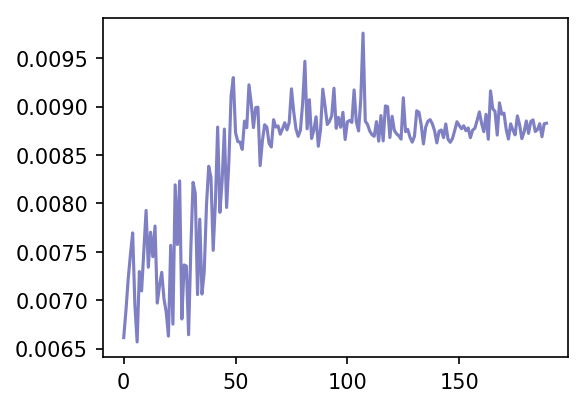

In [223]:
fig = plt.figure(figsize=(4, 3), dpi=150)
plt.plot(mse_history[10:], alpha=0.5, color='darkblue')
plt.show()

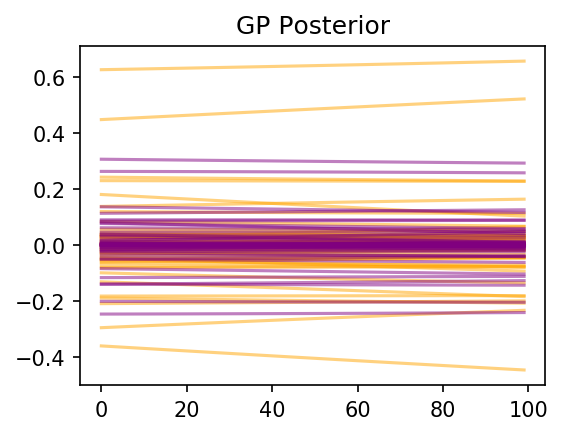

In [224]:
fig = plt.figure(figsize=(4, 3), dpi=150)
for i in range(150, 200):
    plt.plot(F_sample[i][:, 0], alpha=0.5, color='orange')
for i in range(150, 200):
    plt.plot(F_sample[i][:, 1], alpha=0.5, color='purple')
#for j in range(2):
#    plt.plot(components[:, j], alpha=0.5, lw=4)
plt.title('GP Posterior')
plt.show()

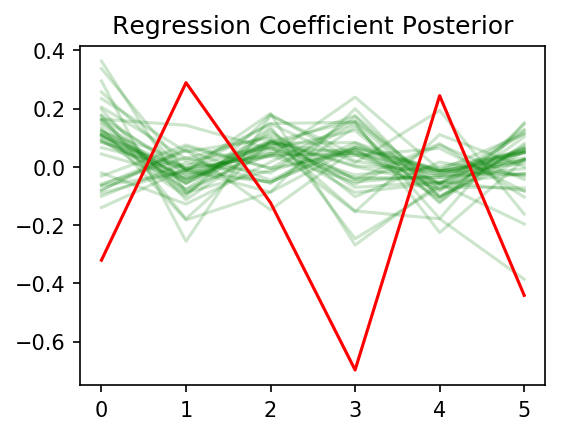

In [225]:
fig = plt.figure(figsize=(4, 3), dpi=150)
for i in range(10, 50):
    plt.plot(loading_sample[i].flatten(), alpha=0.2, color='green')
plt.plot(loading.flatten(), color='red')
plt.title('Regression Coefficient Posterior')
plt.show()

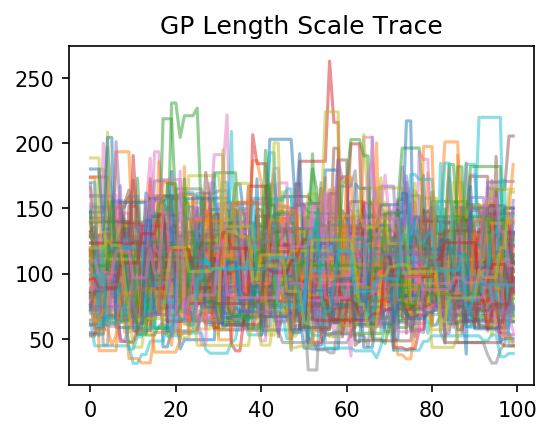

In [226]:
fig = plt.figure(figsize=(4, 3), dpi=150)
for i in range(100, 200):
    plt.plot(trace_sample[i][0]['l'], alpha=0.5)
plt.title('GP Length Scale Trace')
plt.show()

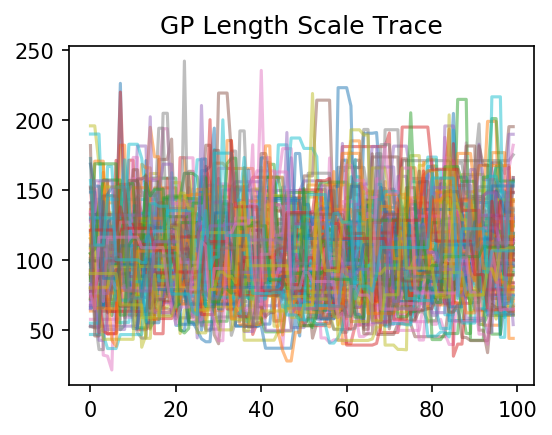

In [227]:
fig = plt.figure(figsize=(4, 3), dpi=150)
for i in range(100, 200):
    plt.plot(trace_sample[i][1]['l'], alpha=0.5)
plt.title('GP Length Scale Trace')
plt.show()